In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
Gender Average difference is 1405.4200199276147
Smoker Average difference is 23609.571525023915
Regions Average difference is -28245.699420654

correlation coefficient 
 age         0.298308
sex         0.058044
bmi         0.198401
children    0.067389
smoker      0.787234
region     -0.039144
charges     1.000000
Name: charges, dtype: float64




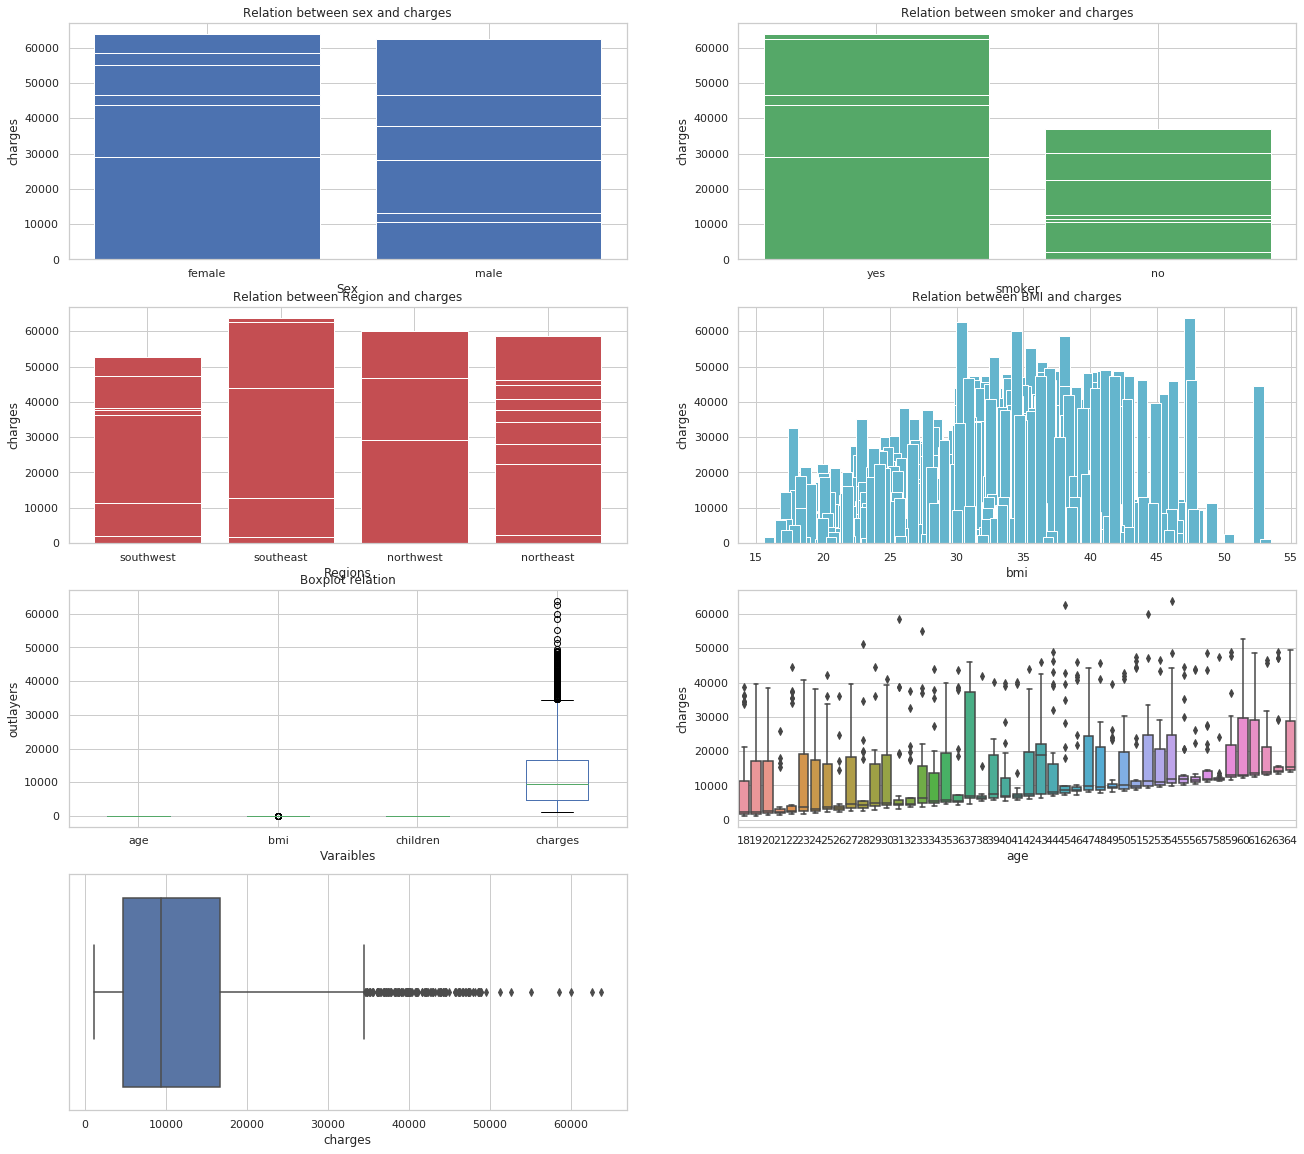

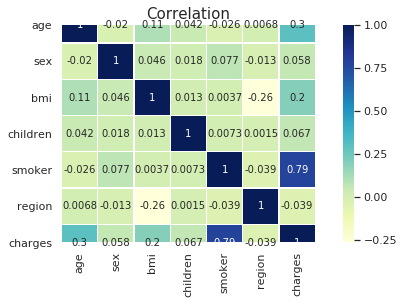

<Figure size 720x288 with 0 Axes>

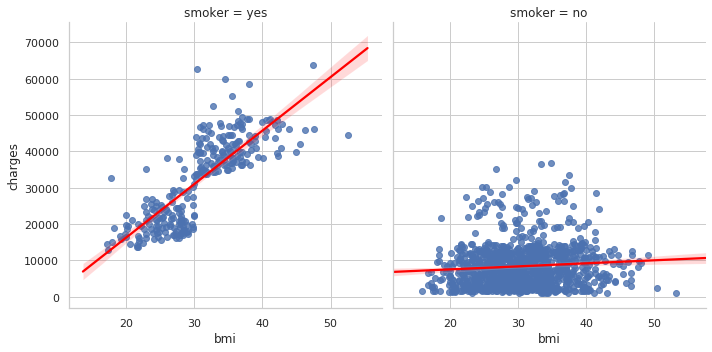

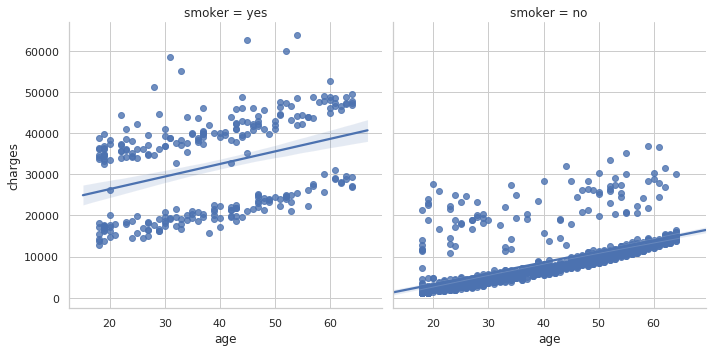

In [176]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
fig=pyplot.figure(figsize=(22,20))
df=pd.read_csv('insurance.csv')
#Data Cleaning
print(df.describe())
null_values=df.isnull().sum()
df=df.drop_duplicates(df.columns).reset_index(drop=True)
ax1=fig.add_subplot(4,2,1)
ax1.bar(df['sex'],df['charges'])
ax1.set_xlabel('Sex')
ax1.set_ylabel('charges')
ax1.set_title('Relation between sex and charges')
Gender_group = df.groupby("sex")["charges"].mean()
Gender_Average=Gender_group['male']-Gender_group['female']
print(f'Gender Average difference is {Gender_Average}')
ax2=fig.add_subplot(4,2,2)
ax2.bar(df['smoker'],df['charges'],color='g')
ax2.set_xlabel('smoker')
ax2.set_ylabel('charges')
ax2.set_title("Relation between smoker and charges")
smoke_group=df.groupby('smoker')['charges'].mean()
smoker_average=smoke_group['yes']-smoke_group['no']
print(f"Smoker Average difference is {smoker_average}")
#EDA
ax3=fig.add_subplot(4,2,3)
ax3.bar(df['region'],df['charges'],color='r')
ax3.set_xlabel('Regions')
ax3.set_ylabel('charges')
ax3.set_title('Relation between Region and charges')
region_group=df.groupby('region')['charges'].mean()
region_average=region_group['southwest']-region_group['southeast']-region_group['northwest']-region_group['northeast']
print(f"Regions Average difference is {region_average}")
ax4=fig.add_subplot(4,2,4)
ax4.bar(df['bmi'],df['charges'],color='c')
ax4.set_xlabel('bmi')
ax4.set_ylabel('charges')
ax4.set_title('Relation between BMI and charges')
ax5=fig.add_subplot(4,2,5)
df.boxplot(column=['age','bmi','children','charges'])
ax5.set_xlabel('Varaibles')
ax5.set_ylabel('outlayers')
ax5.set_title('Boxplot relation')
ax6=fig.add_subplot(4,2,6)
sns.boxplot(x=df["age"],y=df['charges'])
ax6=fig.add_subplot(4,2,7)
sns.boxplot(df['charges'])
#Correlation Coefficent 
replace_smoker_region={'sex':{'male':1,'female':0},'smoker':{'yes':1,'no':0},'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}}
df1=df.replace(replace_smoker_region)
print()
print(f"correlation coefficient \n {df1.corr()['charges']}")
print()
pyplot.figure(figsize=(10,4))
sns.heatmap(df1.corr(),annot=True,square=True,cmap="YlGnBu",linewidths=0.30,linecolor='white')
pyplot.title('Correlation',y = 1.05, size=15)
print()
pyplot.figure(figsize=(10,4))
sns.lmplot(x="bmi",y='charges',col='smoker',data=df,line_kws={'color': 'red'},palette='coolwarm')
sns.lmplot(x="age",y="charges",col='smoker',data=df)









In [ ]:
#Simple linear Regression

In [177]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_squared_log_error
X=df1.drop(['region','charges','sex','children'],axis=1).values
Y=df1['charges'].values.reshape(-1,1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)
regressor_linear = LinearRegression()
regressor_linear.fit(X_train,Y_train)
y_prediction=regressor_linear.predict(X_test)
regressor_linear.score(X_test,Y_test)
print(f"Accuracy Prediction:{mean_squared_log_error(Y_test,abs(y_prediction))}")

Accuracy Prediction:0.4063246021816468


In [ ]:
#Multivaraible linear Regression

In [178]:
X=df1.drop(['charges'],axis=1).values
Y=df1['charges'].values.reshape(-1,1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)
regressor_linear = LinearRegression()
regressor_linear.fit(X_train,Y_train)
y_predict=regressor_linear.predict(X_test)
print(f"Accuracy Prediction: {regressor_linear.score(X_test,Y_test)}")
print(f"MSLE Error rate: {mean_squared_log_error(Y_test,abs(y_predict))}")
print(f"SMSE Error rate: {np.sqrt(mean_squared_error(Y_test,y_predict))}")

Accuracy Prediction: 0.7789443460056124
MSLE Error rate: 0.44059563178682754
SMSE Error rate: 5686.930203443794


In [164]:
#polynomial regression

In [179]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_squared_log_error
X=df1.drop(['region','charges'],axis=1).values
Y=df1['charges'].values.reshape(-1,1)
polynomial_regression  = PolynomialFeatures(degree=2)
X_polynomial_data = polynomial_regression.fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(X_polynomial_data,Y,test_size=0.33)
linear_regression = LinearRegression()
linear_regression = linear_regression.fit(X_train,Y_train)
predictions=linear_regression.predict(X_test)
print(f"prediction Accurac : {linear_regression.score(X_test,Y_test)}")
print(f"MSLE Error rate  : {mean_squared_log_error(Y_test,abs(predictions))}")
print(f"SMSE Error rate  : {np.sqrt(mean_squared_error(Y_test,predictions))}")


prediction Accurac : 0.8217509236948178
MSLE Error rate  : 0.1803031593035
SMSE Error rate  : 4987.400478607995


In [180]:
#crossvalidation
from sklearn.model_selection import cross_val_score,cross_val_predict
score=cross_val_score(linear_regression,X_polynomial_data,Y,cv=10)
predictions=cross_val_predict(linear_regression,X_polynomial_data,Y,cv=10)
print(f" MSLE Error rate  : {mean_squared_log_error(Y,abs(predictions))}")
print(f" MSER Error rate  : {np.sqrt(mean_squared_error(Y,abs(predictions)))}")
print(f" prediction Accuracy : {score.mean()}")

 MSLE Error rate  : 0.16991918526811065
 MSER Error rate  : 4848.619445200864
 prediction Accuracy : 0.8378744932152553


In [ ]:
#Visualization

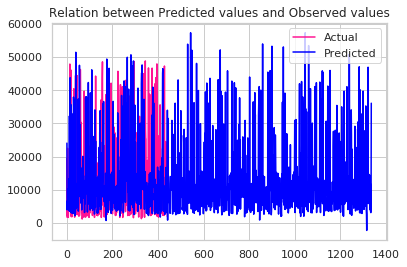

In [181]:
pyplot.plot(Y_test, color = 'deeppink', label = 'Actual')
pyplot.plot(predictions, color = 'blue', label = 'Predicted')
pyplot.title("Relation between Predicted values and Observed values")
pyplot.legend()

Text(0.5, 1.0, 'original and pridicted value')

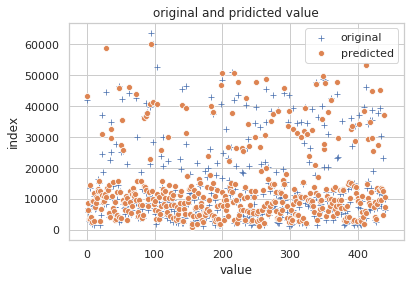

In [182]:
X=df1.drop(['region','charges'],axis=1).values
Y=df1['charges'].values.reshape(-1,1)
polynomial_regression  = PolynomialFeatures(degree=2)
X_polynomial_data = polynomial_regression.fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(X_polynomial_data,Y,test_size=0.33)
linear_regression = LinearRegression()
linear_regression = linear_regression.fit(X_train,Y_train)
predictions=linear_regression.predict(X_test)
predicted_values=pd.DataFrame({'Test':Y_test.ravel(),'predicted_values':predictions.ravel()})
sns.scatterplot(x=predicted_values.index,y=predicted_values.Test,marker='+',label='original')
sns.scatterplot(x=predicted_values.index,y=predicted_values.predicted_values,marker='o',label='predicted')
pyplot.xlabel("value")
pyplot.ylabel("index")
pyplot.title("original and pridicted value")

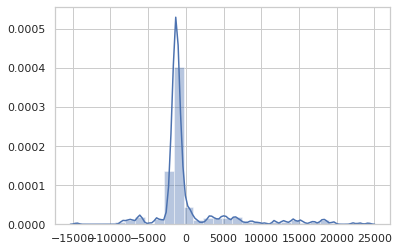

In [183]:
sns.distplot(Y_test-predictions,bins=30)

Text(0.5, 1.0, 'Relation beween Prediction points and Observed points')

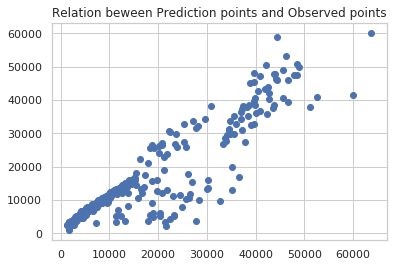

In [184]:
pyplot.scatter(Y_test,predictions)
pyplot.title("Relation beween Prediction points and Observed points")